In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate random data
m = 1000  # Number of samples
X = np.random.rand(m, 1) * 10  # Single feature (1D for simplicity)

# Nonlinear relationship (sine wave with noise)
y = np.sin(X).ravel() + np.random.randn(m) * 0.1  # y = sin(X) + noise

In [3]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Use the same scaler for test data

In [4]:
# Initialize SVR model with RBF kernel
svr_model = SVR(kernel="rbf", C=1.0, epsilon=0.1, gamma="scale")

In [5]:
# Train the model
svr_model.fit(X_train, y_train)

SVR()

In [6]:
# Predict on test set
y_test_pred = svr_model.predict(X_test)

Test MSE: 0.0092
Test R²: 0.9797


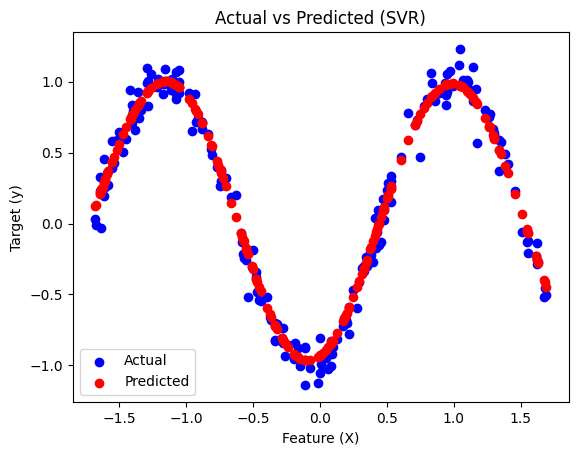

In [7]:
# Metrics
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print(f"Test MSE: {mse:.4f}")
print(f"Test R²: {r2:.4f}")

# Visualize predictions vs actual
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.scatter(X_test, y_test_pred, color="red", label="Predicted")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Actual vs Predicted (SVR)")
plt.legend()
plt.show()

In [8]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    "C": [0.1, 1, 10],  # Regularization parameter
    "epsilon": [0.01, 0.1, 0.5],  # Epsilon-tube width
    "gamma": ["scale", "auto"]  # Kernel coefficient
}

# Grid search
grid_search = GridSearchCV(SVR(kernel="rbf"), param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Refit model with best hyperparameters
svr_model = grid_search.best_estimator_

Best Hyperparameters: {'C': 10, 'epsilon': 0.01, 'gamma': 'scale'}


In [9]:
# New data (random example)
new_data = np.array([[5]])  # New input
new_data_scaled = scaler.transform(new_data)  # Apply same scaling

# Predict
prediction = svr_model.predict(new_data_scaled)
print(f"Prediction for new data: {prediction}")

Prediction for new data: [-0.93168318]
